# Welcome to C277B: Machine Learning Algorithms     
## Homework assignment #1: Local Optimization Methods 

### Student Name: Charis Liao

In this jupyter notebook, you will find answers to each problem in homework 1 of the Machine Learning Algorithm course. Concepts covered includes:   
- Bisection     
- Golden Section    
- Local optimization using 1st and quasi-2nd order methods 
- Steepest Descent 
- Congugate Gradient 
- BFGS
- Stochastic Gradient 
- Stochastic Gradient Descent with Momentum (SGDM) 

**Due Date: Feb 7, 2023** 



## 1. Bisection vs. Golden Section 

In class we used the simple bisection method to take the first step in isolating at least one minimum for the function shown. This first step in placement of `d` reduced the original interval `[a,b,c] = 1.0` to `[a,b,d] = 0.75`. But in general. the average size interval `<L>` after Step 1 is determined by the equal probability of placing point d in either sub-interval, such that `<L1>`= P(left-interval) x `1/2` + P(right-interval)x`3/4` = 0.625 (since we can't a `priori` know the best half)

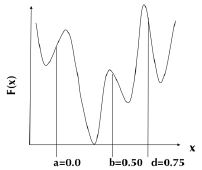

#### (a) For step 2, place point `e` at the bisector of larger interval `[a,b]`. Why is this better than `[b,d]`?    
A larger interval has a higher probability of containing a minimum. 

#### (b) What is the new interval and how much is the search space reduced?     
If `e < a` and `e < b`, then the new interval is `[a, e, b]`. The search space is reduced by `1/3`, so the new search area is `2/3` of the original search space.     

#### (c) For step 3, reduce the size of the interval from step 2 by placing point `f` at the bisection of your choice. 
`f` was placed in between a and e.     

#### (d) Fill in the tree for all possible size intervals for steps 2 and 3. Write your answers in ratios to the interval size of the previous steps.     

**My answers will be from top to bottom and left to right**

Step 1: 1/2 and 3/4.    
Step 2: 1/2, 3/4, 2/3, 2/3.       
Step 3: 1/2, 3/4, 2/3, 2/3, 1/2, 3/4, 1/2, 3/4.     



  



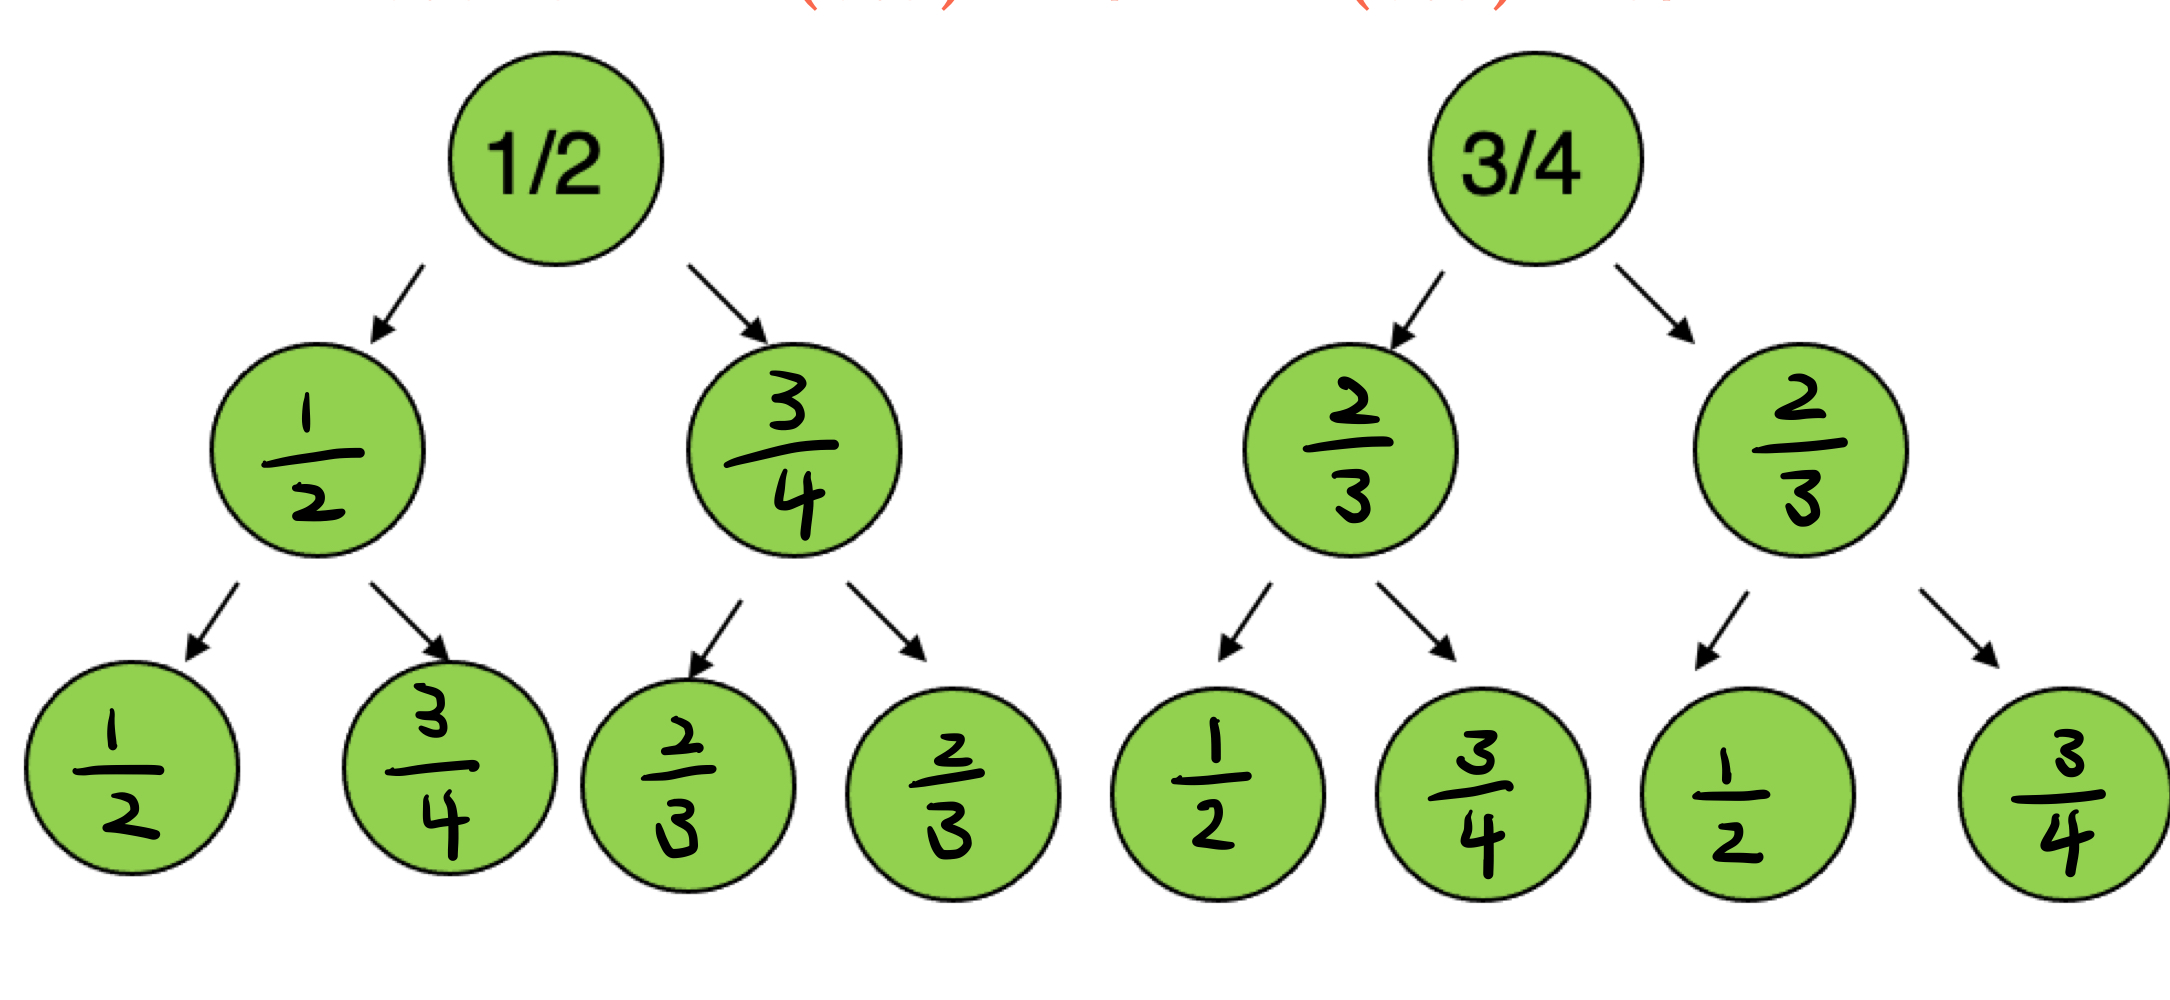

In [1]:
step3 = 0.125 *((0.5**3)+(0.5**2 * (3/4))+((3/4)*(2/3)*2*0.5)+((3/4)*(2/3)*(1+2 * (3/4))))
step3

0.2578125

#### (e) What is average size of interval at steps 2 and 3?     

Step 2 New interval size: $P(0.25)\times\frac{1}{2}\times\frac{1}{2}+P(0.25)\times\frac{3}{4}\times\frac{1}{2}+P(0.25)\times\frac{2}{3}\times\frac{3}{4}+P(0.25)\times\frac{2}{3}\times\frac{3}{4} = 0.46875$      

Step 3 New interval size: $P(0.125)\times\frac{1}{2}\times\frac{1}{2}+P(0.125)\times\frac{3}{4}\times\frac{1}{2}+P(0.125)\times\frac{2}{3}\times\frac{3}{4}+P(0.125)\times\frac{2}{3}\times\frac{3}{4}+P(0.125)\times\frac{1}{2}\times\frac{2}{3}+P(0.125)\times\frac{3}{4}\times\frac{2}{3}+P(0.125)\times\frac{1}{2}\times\frac{2}{3}+P(0.125)\times\frac{3}{4}\times\frac{2}{3} = 0.2578125$    

#### (f) How much does Golden Section improve over Bisection at each step? Please use a chart of steps v.s. different methods to show their difference.     

| Avg. Step Size | Golden Section | Bisection | 
|----------------|----------------|-----------|
| Step 1         |    0.618       |  0.6250   |
| Step 2         |    0.382       |  0.4688   |
| Step 3         |    0.236       |  0.2578   |


## 2. Local optimization using 1st and quasi-2nd order methods         

You will solve following optimization problem using a python code you develop for the steepest descents method! For the function     

$f(x,y) = x^4 - x^2 + y^2 + 2xy - 2$     

there are three stationary points found over the range x = [2,2] and y = [-2, 2].



In [2]:
# A timing decorator.
import time

def timeit(f):

    def timed(*args, **kw):

        ts = time.time()
        result = f(*args, **kw)
        te = time.time()

        print('func:%r took: %2.4f sec' % (f.__name__,  te-ts))
        return result

    return timed

#### (a) Starting from point `(1.5, 1.5)`, and with stepsize = 0.1, determine new $(x,y)$ position using one step of the steepest descent algorithm (check against the debugging output). Is it a good optimization step? Depending on this this outcome, how will you change the stepsize in the next step? 


In [3]:
from pylab import *
import numpy.linalg as LA

def function(point):
    x = point[0]
    y = point[1]
    return x**4 - x**2 + y**2 + 2*x*y - 2 

def first_deriv(point):
    x = point[0]
    y = point[1]
    return np.array([4*x**3 - 2*x + 2*y , 2*x + 2*y]) 


def new_position(func, first_derivative, starting_point, stepsize):
    new_point = starting_point - (stepsize * first_derivative(starting_point))
       
    print(f'new point: {new_point} , starting point: {starting_point}')
    print(f'new output: {func(new_point)} , starting output: {func(starting_point)}')

In [4]:
new_position(function, first_deriv, np.array([1.5, 1.5]), 0.1)

new point: [0.15 0.9 ] , starting point: [1.5 1.5]
new output: -0.9419937500000004 , starting output: 7.5625


It is a good optimization step because the new output is less than the starting output. Since the outcome is desired, we shall increase the stepsize by multiplying 1.2. 


#### (b) Implement the steepest decent using the provided template. Continue execting steepest descent. How many steps does it take to converge to the local minimum to tolernace = $1 \times 10^{-5}$ of the gradient (check again debugging output and compare code timings)?    
#### Note: You don't need to use line seach, just take one step in the search direction, and use the following stepsize update:      

$\lambda = \begin{array}{cc}\{ & \begin{array}{cc} 1.2\lambda & \text{for a good step} \\ 0.5 \lambda & \text{for a bad step} \end{array} \end{array}$     


In [5]:
@timeit
def steepest_descent(func,first_derivate,starting_point,stepsize,tol):
    # evaluate the gradient at starting point
    
    count=0
    visited=[starting_point]
    deriv = first_derivate(starting_point)
    new_point = starting_point
    
    while LA.norm(deriv) > tol and count < 1e6:
        # calculate new point position      
        
        prev = new_point
        new_point = prev - (stepsize * first_derivate(prev))
        deriv = first_derivate(new_point)
        visited.append(new_point)
      
        
        if func(new_point) < func(prev):
            # the step makes function evaluation lower - it is a good step. what do you do?
            stepsize = 1.2 * stepsize
            
        else:
            # the step makes function evaluation higher - it is a bad step. what do you do?
            stepsize = 0.5 * stepsize 
        count+=1
    # return the results
    return {"x":starting_point,"evaluation":func(starting_point),"path":np.asarray(visited), "count": count}

In [6]:
steepest_descent(function, first_deriv, np.array([1.5, 1.5]), 0.1, 1e-5)

func:'steepest_descent' took: 0.0012 sec


{'x': array([1.5, 1.5]),
 'evaluation': 7.5625,
 'path': array([[ 1.5       ,  1.5       ],
        [ 0.15      ,  0.9       ],
        [-0.03162   ,  0.648     ],
        [-0.22733235,  0.47048256],
        [-0.4603766 ,  0.38644985],
        [-0.73063964,  0.41710875],
        [-0.91361447,  0.57314178],
        [-0.89067253,  0.77647099],
        [-1.072703  ,  0.85831194],
        [-0.88004038,  0.93513214],
        [-1.07440969,  0.91144369],
        [-0.8191814 ,  0.99553056],
        [-1.00371455,  0.95003442],
        [-0.98247032,  0.96665308],
        [-1.00196259,  0.97252925],
        [-0.98533102,  0.98565078],
        [-1.0162044 ,  0.98547972],
        [-0.99022477,  0.99369805],
        [-1.00370679,  0.9925832 ],
        [-0.9936794 ,  0.99686773],
        [-1.00672832,  0.99539405],
        [-0.99782619,  0.99801346],
        [-1.00028169,  0.99796153],
        [-0.99913443,  0.99873366],
        [-1.00035525,  0.9988937 ],
        [-0.99897351,  0.99959411],
        

It took 45 steps to converge to the local minimum. 


#### (c) Compare your steepest descent code against conjugate gradients (CG), and BFGS to determine the local minimum starting from $(1.5, 1.5)$. In terms of number of steps, are conjugate gradients and/or BFGS more efficient than steepest descents?    

Note: See SciPy documentation on how to use CG and BFGS, examples available at the end of webpage: https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html

In [7]:
from scipy.optimize import minimize
x0 = np.array([1.5, 1.5])

minimize(function, x0, method = "CG", options={'disp': True, 'gtol': 1e-5})

/opt/anaconda3/envs/msse-python/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Optimization terminated successfully.
         Current function value: -3.000000
         Iterations: 9
         Function evaluations: 78
         Gradient evaluations: 26


     fun: -2.99999999999959
     jac: array([ 2.08616257e-07, -1.10268593e-06])
 message: 'Optimization terminated successfully.'
    nfev: 78
     nit: 9
    njev: 26
  status: 0
 success: True
       x: array([-0.99999984,  0.99999929])

In [8]:
minimize(function, x0, method = "BFGS", options={'disp': True, 'gtol': 1e-5})

Optimization terminated successfully.
         Current function value: -3.000000
         Iterations: 7
         Function evaluations: 24
         Gradient evaluations: 8


      fun: -2.9999999999998255
 hess_inv: array([[ 0.12457729, -0.12457659],
       [-0.12457659,  0.62569812]])
      jac: array([-1.63912773e-06, -2.98023224e-08])
  message: 'Optimization terminated successfully.'
     nfev: 24
      nit: 7
     njev: 8
   status: 0
  success: True
        x: array([ 0.99999979, -0.9999998 ])

In terms of number of steps, both CG and BFGS is more efficient with a step count of 7. 

## 3. Local optimization and machine learning using Stochastic Gradient Descent (SGD).     
The Rosenbrock Banana Function looks innocuous enough         
    $f(x,y)=(1-x)^2+10(y-x^2)^2$    
with only one (global) minumum at $(x,y)=(1.0, 1.0)$! 

#### (a) Starting at $x=-0.5$ and $y=1.5$, and using your code for steepest descents with stepsize = 0.1, how many steps to converge to the minimum? Use a tolerance = $1 \times 10^{-5}$

In [13]:
def RosenbrockBanana(point):
    x = point[0]
    y = point[1]  
    return (1 - x)**2 + 10 * (y - x**2)**2

def RosenbrockBanana_Deriv(point):
    x = point[0]
    y = point[1]
    return np.array([-2 * (1-x) - 40*x*(y-x**2), 20*(y-x**2)])

In [14]:
steepest_descent(RosenbrockBanana, RosenbrockBanana_Deriv, np.array([-0.5, 1.5]), 0.01, 1e-5)

func:'steepest_descent' took: 0.0290 sec


{'x': array([-0.5,  1.5]),
 'evaluation': 17.875,
 'path': array([[-0.5       ,  1.5       ],
        [-0.72      ,  1.25      ],
        [-0.93156096,  1.074416  ],
        ...,
        [ 0.99999058,  0.99998155],
        [ 0.99999099,  0.99998145],
        [ 0.99999095,  0.9999816 ]]),
 'count': 1165}

From the result above, 8 steps seemed to be the answer. However, I noticed that within 8 steps, the minimum is converging to `nan` and `-inf` which seemed odd. Therefore, I would say that this is not converging. If we change the step size to 0.01, then it will converge. 

#### (b) By adding a small amount of stochastic noise to the gradient at every step (In your code add a random vector that is the same norm as the gradient at that step), which is equivalent to a small batch derivative of any loss function in deep learning, implement your own stochastic gradient descent code by modifying on your steepest descent code, and run SGD algorithm. (Check against debugging outputs.) 

In [42]:
@timeit
def stochastic_gradient_descent(func,first_derivate,starting_point,stepsize,tol=1e-5,stochastic_injection=1):
    '''stochastic_injection: controls the magnitude of stochasticity (multiplied with stochastic_deriv)
        0 for no stochasticity, equivalent to SD. 
        Use 1 in this homework to run SGD
    '''
    # evaluate the gradient at starting point
    
    count=0
    visited=[starting_point]
    deriv = first_derivate(starting_point)
    new_point = starting_point
    while LA.norm(deriv) > tol and count < 1e5:
        
        
        if stochastic_injection>0:
            # formulate a stochastic_deriv that is the same norm as your gradient 
            random_vector = np.random.normal(0,1,2)
            stochastic_deriv =  random_vector/LA.norm(random_vector)*LA.norm(deriv)
           
        else:
            stochastic_deriv=np.zeros(len(starting_point))
        direction=-(deriv+stochastic_injection*stochastic_deriv)
        
        
        # calculate new point position
        prev = new_point
        new_point = prev + (stepsize*direction)
        deriv = first_derivate(new_point)
        visited.append(new_point)
      
        if func(new_point) < func(prev):
            # the step makes function evaluation lower - it is a good step. what do you do?
            stepsize = 1.2 * stepsize
            
        else:
            # the step makes function evaluation higher - it is a bad step. what do you do?
            stepsize = 0.5 * stepsize
        count+=1
    return {"x":starting_point,"evaluation":func(starting_point),"path":np.asarray(visited), "count": count}

In [43]:
stochastic_gradient_descent(RosenbrockBanana,RosenbrockBanana_Deriv,np.array([-0.5, 1.5]),0.01,tol=1e-5,stochastic_injection=1)

func:'stochastic_gradient_descent' took: 0.0798 sec


{'x': array([-0.5,  1.5]),
 'evaluation': 17.875,
 'path': array([[-0.5       ,  1.5       ],
        [-0.38699204,  1.24761215],
        [-0.44540457,  0.69096069],
        ...,
        [ 0.99998868,  0.99997754],
        [ 0.99998903,  0.99997779],
        [ 0.99998921,  0.99997799]]),
 'count': 2033}

#### (c) Evaluate how much better or worse is the SGD convergence against the CG and BFGS method to find the global minimum, in terms of number of steps. Converge function/gradient to tolerance = $1 \times 10^{-5}$

In [44]:
minimize(RosenbrockBanana, np.array([-0.5, 1.5]), method = "CG", options={'disp': True, 'gtol': 1e-5})

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 20
         Function evaluations: 132
         Gradient evaluations: 44


     fun: 2.0711814827200667e-13
     jac: array([ 4.94555024e-08, -2.45172016e-08])
 message: 'Optimization terminated successfully.'
    nfev: 132
     nit: 20
    njev: 44
  status: 0
 success: True
       x: array([0.99999955, 0.99999908])

In [45]:
minimize(RosenbrockBanana, np.array([-0.5, 1.5]), method = "BFGS", options={'disp': True, 'gtol': 1e-5})

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 22
         Function evaluations: 93
         Gradient evaluations: 31


      fun: 1.6856836004019217e-13
 hess_inv: array([[0.50988602, 1.01962714],
       [1.01962714, 2.08896666]])
      jac: array([ 1.15312325e-07, -1.29424893e-08])
  message: 'Optimization terminated successfully.'
     nfev: 93
      nit: 22
     njev: 31
   status: 0
  success: True
        x: array([0.99999959, 0.99999917])

CG and BFGS are better than SDG in terms of how many iterations they've all gone through before they converged. 

| number of steps | SGD | CG | BFGS | 
|-----------------|-----|----|------|
|                 | 2056| 22 | 20   |

#### (d) Can you draw a firm conclusion on the outcome with just one run of each method? If not, explain why.

Yes, I can draw a firm conclusion with just one run of each method because they all converged. As long as they converged, there's at least one local minimum. 

#### (e) Run all the algorithms multiple times starting at different $(x, y)$ positions to understand the average performance of each. Explain the relative performance of the non-stochastic and stochastic methods on the Rosenbrock Banana Function. 

##### Steepest Descent

In [58]:
def avg_performance_SD(iterations, starting_point):
    count = 0
    for i in range(iterations):
        count += steepest_descent(RosenbrockBanana, RosenbrockBanana_Deriv, starting_point, 0.01, 1e-5)['count']
    average_steps = count / iterations
    return print(f"The average performance (step counts) is {average_steps} steps")  

In [59]:
avg_performance_SD(10, np.array([1.5, 1.5]))

func:'steepest_descent' took: 0.0319 sec
func:'steepest_descent' took: 0.0158 sec
func:'steepest_descent' took: 0.0165 sec
func:'steepest_descent' took: 0.0181 sec
func:'steepest_descent' took: 0.0152 sec
func:'steepest_descent' took: 0.0148 sec
func:'steepest_descent' took: 0.0143 sec
func:'steepest_descent' took: 0.0146 sec
func:'steepest_descent' took: 0.0143 sec
func:'steepest_descent' took: 0.0147 sec
The average performance (step counts) is 1203.0 steps


#### Stochastic Gradient Descent (SGD)

In [71]:
def avg_performance_SGD(iterations, starting_point):
    count = 0
    for i in range(iterations):
        count += stochastic_gradient_descent(RosenbrockBanana,RosenbrockBanana_Deriv,starting_point,0.01,tol=1e-5,stochastic_injection=1)['count']
    average_steps = count / iterations
    return print(f"The average performance (step counts) is {average_steps} steps")  


In [72]:
avg_performance_SGD(10, np.array([1.5, 1.5]))

func:'stochastic_gradient_descent' took: 0.0739 sec
func:'stochastic_gradient_descent' took: 0.0473 sec
func:'stochastic_gradient_descent' took: 0.0550 sec
func:'stochastic_gradient_descent' took: 0.0372 sec
func:'stochastic_gradient_descent' took: 0.0514 sec
func:'stochastic_gradient_descent' took: 0.0521 sec
func:'stochastic_gradient_descent' took: 0.0422 sec
func:'stochastic_gradient_descent' took: 0.1233 sec
func:'stochastic_gradient_descent' took: 0.0918 sec
func:'stochastic_gradient_descent' took: 0.0228 sec
The average performance (step counts) is 2107.0 steps


##### CG

In [64]:
def avg_performance_CG(iterations, starting_point):
    count = 0
    for i in range(iterations):
        count += minimize(RosenbrockBanana, starting_point, method = "CG", options={'disp': True, 'gtol': 1e-5}).nit
    average_steps = count / iterations
    return print(f"The average performance (step counts) is {average_steps} steps")  

In [70]:
avg_performance_CG(10, np.array([1.5, 1.5]))

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 10
         Function evaluations: 79
         Gradient evaluations: 26
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 10
         Function evaluations: 79
         Gradient evaluations: 26
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 10
         Function evaluations: 79
         Gradient evaluations: 26
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 10
         Function evaluations: 79
         Gradient evaluations: 26
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 10
         Function evaluations: 79
         Gradient evaluations: 26
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 10
         Function evaluations: 79
  

##### BFGS 

In [66]:
def avg_performance_BFGS(iterations, starting_point):
    count = 0
    for i in range(iterations):
        count += minimize(RosenbrockBanana, starting_point, method = "BFGS", options={'disp': True, 'gtol': 1e-5}).nit
    average_steps = count / iterations
    return print(f"The average performance (step counts) is {average_steps} steps")

In [67]:
avg_performance_BFGS(10, np.array([1.5, 1.5]))

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 10
         Function evaluations: 36
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 10
         Function evaluations: 36
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 10
         Function evaluations: 36
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 10
         Function evaluations: 36
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 10
         Function evaluations: 36
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 10
         Function evaluations: 36
  

| Average Performance | SD | SGD | CG | BFGS |
|---------------------|----|-----|----|------|
| Number of steps     |1203|2107 | 10 | 10   | 

Apparently, Stochastic Gradient Descent takes more average steps than Steepest Descent. This might due to the fact that the gradient for SGD is not computed for the entire dataset, and only for one random point on each iteration, the updates have higher variance. Higher vairance might cause the algorithm to take more steps to reach the minimum.  


## 4. Stochastic Gradient Descent with Momentum (SGDM).    
The Rosenbrock Banana Function with one minimum is not the best way to illustrate the power of the SGD or SGDM method. Hence we next investigate the Three-Hump Camel function.    
$f(x,y) = 2x^2 - 1.05x^4 + \frac{x^6}{6} + xy + y^2$
$x \in [-2,2], y \in [-2,2]$.   

which is a convex function with three minima. This defines our first "multiple minima" problem where there is a global solution as well as two less optimal solutions.     

#### (a) Utilize SGD to find the *global minimum*, and compare it to CG or BFGS as you did in (2e). Starting from [-1.5, -1.5], converge function and gradient to tolerance = $1 \times 10^{-5}$ with stepsize = $0.1$. On average, did you get a better result in finding the global minimum with SGD in terms of fewer steps on average? 

#### (b) Implement the SGDM algorithm with momemtum $\gamma = 0.9$. Now use SGD with Momentum to find the global minimum. Again start from $[-1.5, -1.5]$ with stepsize = 0.1 and converge function and gradient to tolerance = $1 \times 10^{-5}$. On average, did you get a better result using SGDM compared to SGD, CG, or BFGS in finding the global minimum in terms of fewer steps? 